# This is how data is obtained from Yahoo API
Here we are downloading data from Yahoo API for the fund named paragh parikh long term equity fund (the symbol code is directly provided here).
The block prints below data of last 10 days only. However the start data is defined the code to be start of year 2020.

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime
#from datetime import datetime as dt
PPFAS = '0P0000YWL1.BO'
start = datetime.datetime(2020,1,1)
tilltoday = datetime.date.today()
dfppfas = pdr.get_data_yahoo(PPFAS, start, tilltoday)
dfppfas.drop(columns = ['High','Low','Open','Volume','Adj Close'], inplace = True)
dfppfas.columns = ['NAV Value']
dfppfas['NAV Value'] = round(dfppfas['NAV Value'],4)
dfppfas.to_csv('PPFAS 2020')
dfppfas.tail(10)

/Users/santhoshvasudevan/opt/anaconda3/envs/dashKP/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,NAV Value
Date,
2020-07-20,29.9723
2020-07-21,30.2630
2020-07-22,30.0744
2020-07-23,30.1815
2020-07-24,30.1172
2020-07-27,30.1098
2020-07-28,30.4984
2020-07-29,30.2734
2020-07-30,30.2744


# Below is the code for user amount invested. User Invest twice in the year 1) on start of year, 2) on 2nd March 2020

In [8]:
transactions = {'Date':['2020-1-1','2020-3-2'],
                'Amount Invested': [-100000,-100000]}
tranppfas_df = pd.DataFrame(transactions)
tranppfas_df['Date'] = pd.to_datetime(tranppfas_df['Date'])
tranppfas_df.set_index('Date',inplace = True)
tranppfas_df

,Amount Invested
Date,
2020-01-01,-100000
2020-03-02,-100000


# The downloaded API data is combined with the transactions obtained from the user.
Below code uses pandas dataframe which is also datatype in the above blocks. perform table join. Calculate the necessary parameters in the column. Code prints initial 5 days and last 5 days in case the data is long. Otherwise as specified in the head and tail.

In [18]:
OnePPFASDF = dfppfas.join(tranppfas_df)
OnePPFASDF['Amount Invested'] = OnePPFASDF['Amount Invested'].fillna(0)
OnePPFASDF['Total Investment'] = OnePPFASDF['Amount Invested'].cumsum()*-1
OnePPFASDF['Units Bought'] = round(OnePPFASDF['Amount Invested']*-1/OnePPFASDF['NAV Value'],3)
OnePPFASDF['Total Units'] = OnePPFASDF['Units Bought'].cumsum()
OnePPFASDF['Total Value'] = round(OnePPFASDF['NAV Value']*OnePPFASDF['Total Units'],2)
#OnePPFASDF['Annualized Return'] = 
OnePPFASDF['Profit Loss'] = OnePPFASDF['Total Value']-OnePPFASDF['Total Investment']
OnePPFASDF['Abs Return'] = round(OnePPFASDF['Profit Loss']/OnePPFASDF['Total Investment'],3)*100
OnePPFASDF

,NAV Value,Amount Invested,Total Investment,Units Bought,Total Units,Total Value,Profit Loss,Abs Return
Date,,,,,,,,
2020-01-01,27.8018,-100000.0,100000.0,3596.889,3596.889,99999.99,-0.01,-0.0
2020-01-02,27.9504,0.0,100000.0,-0.000,3596.889,100534.49,534.49,0.5
2020-01-03,27.9797,0.0,100000.0,-0.000,3596.889,100639.88,639.88,0.6
2020-01-06,27.6539,0.0,100000.0,-0.000,3596.889,99468.01,-531.99,-0.5
2020-01-07,27.7640,0.0,100000.0,-0.000,3596.889,99864.03,-135.97,-0.1
...,...,...,...,...,...,...,...,...
2020-07-27,30.1098,0.0,200000.0,-0.000,7287.443,219423.45,19423.45,9.7
2020-07-28,30.4984,0.0,200000.0,-0.000,7287.443,222255.35,22255.35,11.1
2020-07-29,30.2734,0.0,200000.0,-0.000,7287.443,220615.68,20615.68,10.3


In [19]:
#Save the data into a CSV file as the name specified here.
OnePPFASDF.to_csv('portfoliovalue.csv')

# Code below is taken from stackoverflow and other code sources.

Functions are defined as such.

In [16]:
from scipy import optimize

def xnpv(rate,cashflows):
    chron_order = sorted(cashflows, key = lambda x: x[0])
    t0 = chron_order[0][0]
    if rate <= -1.0:
        return float('inf')
    return sum([iv/(1+rate)**((t-t0).days/365.0) for (t,iv) in chron_order])

def xirr(cashflows,guess=0.1):
    tot = 0
    tot = [tot + i[1] for i in cashflows]
    #print(tot)
    #print(cashflows)
    if sum(tot) < 0:
        guess = guess*-1
    #print(guess)
    return optimize.newton(lambda r: xnpv(r,cashflows),guess)

,NAV Value,Amount Invested,Total Investment,Units Bought,Total Units,Total Value,Profit Loss,Abs Return,XIRR
Date,,,,,,,,,
2020-03-06,26.8220,0.0,200000.0,-0.0,7287.443,195463.80,-4536.20,-2.3,-21.72
2020-03-09,25.9759,0.0,200000.0,-0.0,7287.443,189297.89,-10702.11,-5.4,-42.04
2020-03-11,26.0018,0.0,200000.0,-0.0,7287.443,189486.64,-10513.36,-5.3,-39.79
2020-03-12,24.5251,0.0,200000.0,-0.0,7287.443,178725.27,-21274.73,-10.6,-10.00
2020-03-13,24.1784,0.0,200000.0,-0.0,7287.443,176198.71,-23801.29,-11.9,-10.00
...,...,...,...,...,...,...,...,...,...
2020-07-27,30.1098,0.0,200000.0,-0.0,7287.443,219423.45,19423.45,9.7,20.97
2020-07-28,30.4984,0.0,200000.0,-0.0,7287.443,222255.35,22255.35,11.1,24.04
2020-07-29,30.2734,0.0,200000.0,-0.0,7287.443,220615.68,20615.68,10.3,22.04


# each row in the dataframe is taken and the XIRR for the particular row is calculated and fed in the dataframe as separate column name XIRR

But notice the XIRR flattening after crossing -39.79 to -10.00 for some days untill the overall portfolio value comes back. The particular data is shown after 6th March 2020

In [20]:
for index,row in OnePPFASDF.iloc[1:].iterrows():
    local_df = OnePPFASDF.loc[:index]
    local_df = local_df[local_df['Amount Invested'] != 0]
    dates = local_df.index.to_list()
    cf = local_df['Amount Invested'].to_list()
    
    cashflows = [(date,amount) for date,amount in zip(dates,cf)]
    
    cashflows.append((row.name,OnePPFASDF.loc[index]['Total Value']))
    OnePPFASDF.loc[index,'XIRR'] = round(xirr(cashflows)*100,2)
    
OnePPFASDF['XIRR'].fillna(0,inplace= True)

OnePPFASDF['2020-3-6':]

,NAV Value,Amount Invested,Total Investment,Units Bought,Total Units,Total Value,Profit Loss,Abs Return,XIRR
Date,,,,,,,,,
2020-03-06,26.8220,0.0,200000.0,-0.0,7287.443,195463.80,-4536.20,-2.3,-21.72
2020-03-09,25.9759,0.0,200000.0,-0.0,7287.443,189297.89,-10702.11,-5.4,-42.04
2020-03-11,26.0018,0.0,200000.0,-0.0,7287.443,189486.64,-10513.36,-5.3,-39.79
2020-03-12,24.5251,0.0,200000.0,-0.0,7287.443,178725.27,-21274.73,-10.6,-10.00
2020-03-13,24.1784,0.0,200000.0,-0.0,7287.443,176198.71,-23801.29,-11.9,-10.00
...,...,...,...,...,...,...,...,...,...
2020-07-27,30.1098,0.0,200000.0,-0.0,7287.443,219423.45,19423.45,9.7,20.97
2020-07-28,30.4984,0.0,200000.0,-0.0,7287.443,222255.35,22255.35,11.1,24.04
2020-07-29,30.2734,0.0,200000.0,-0.0,7287.443,220615.68,20615.68,10.3,22.04


# Plot the data for better view of different columns over the 2020 time period

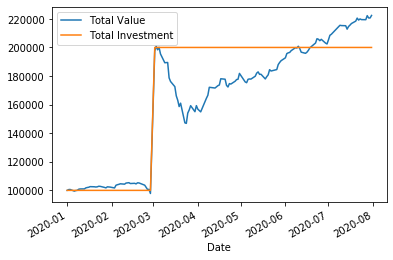

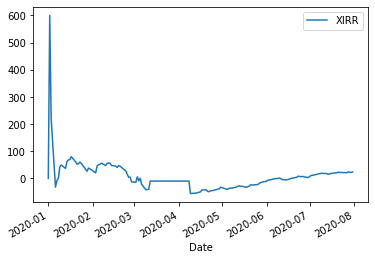

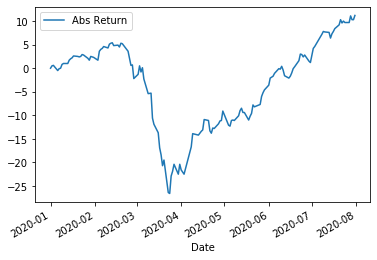

In [17]:
OnePPFASDF.reset_index().plot(x = 'Date', y= ['Total Value','Total Investment'], kind = 'line')
OnePPFASDF.reset_index().plot(x = 'Date', y= ['XIRR'], kind = 'line')
OnePPFASDF.reset_index().plot(x = 'Date', y= ['Abs Return'], kind = 'line')
#OnePPFASDF.reset_index().plot(x = 'Date', y= 'Annualized Return', kind = 'line')